### Pima Indian Diabetes Analysis

We will use logistic regression to model the "Pima Indians Diabetes" data set. This model will predict which people are likely to develop diabetes.


This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.


<b>Data Dictionary</b>:

Preg: Number of times pregnant<br>
Plas: glucose concentration a 2 hours in an oral glucose tolerance test<br>
Pres: blood pressure (mm Hg)<br>
Skin: skin fold thickness (mm)<br>
test: 2-Hour serum insulin (mu U/ml)<br>
mass: BMI (weight in kg/(height in m)^2)<br>
pedi: pedigree function<br>
age: Age (years)<br>
Class: variable (0 or 1) 268 of 768 are 1, the others are 0<br>

### Assuptions of logistics regression
- The observations are indepenent
- there is no multicollinearity among explanatory variables
- there no extreme outliers
- There is a linear relationship between exploratory variables and the logit of the response variable
- logit = log of odds
- the samples size is sufficeintly larger
 -  you dont have to worry about multicolinearity with logistic regression

## Import Libraries

In [ ]:
# Importing necessary libraries for data manipulation, visualization, and analysis
import numpy as np  # Linear algebra
import pandas as pd  # Data processing
import matplotlib.pyplot as plt  # Data visualization
%matplotlib inline
import seaborn as sns  # Enhanced data visualization

# Importing additional libraries for preprocessing and modeling
from sklearn.impute import SimpleImputer  # Missing value imputation
from sklearn.model_selection import train_test_split  # Data splitting
from sklearn.preprocessing import MinMaxScaler  # Feature scaling
from sklearn.linear_model import LogisticRegression  # Logistic regression model
from sklearn.metrics import (accuracy_score, recall_score, precision_score, f1_score, confusion_matrix)  # Evaluation metrics
from  imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load and review data

In [ ]:
# Path to the dataset
data_path = "/content/drive/MyDrive/data science /hull online/Ailead/ML /supervise learning /pima-indians-diabetes.csv"

# Read the dataset
df = pd.read_csv(data_path)

### Data exploration

In [ ]:
# checking our data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Preg    768 non-null    int64  
 1   Plas    768 non-null    int64  
 2   Pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# Check for missing values
df.isnull().sum()


Preg     0
Plas     0
Pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [ ]:
# Check number of columns and rows in data frame
df.head()


,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# check duplicate
df.duplicated().sum()

0

### Visualize the data

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None, title = None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage
    plt.title(title)
    plt.show()  # show the plot

<ipython-input-56-9e54a4cfdff9>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


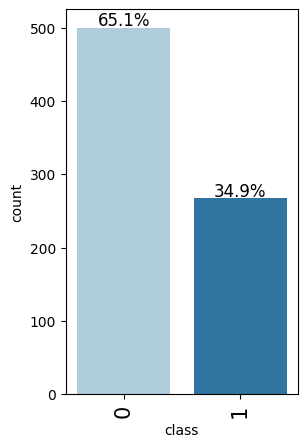

In [ ]:
labeled_barplot(data=df,feature="class", perc=True)

In [ ]:
# another way to get the % without visualizing is to use
df["class"].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: class, dtype: float64

So we have 34.90% people in current data set who have diabetes and rest of 65.10% doesn't have diabetes.

Its a good distribution True/False cases of diabetes in data.

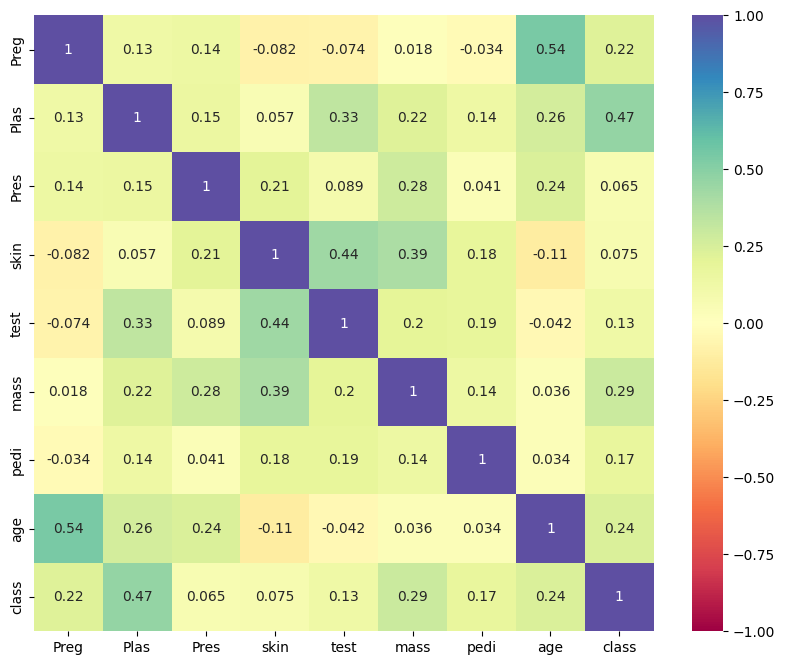

In [ ]:
# creat a  heat map
mat_corr= df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(mat_corr,annot=True,vmin=-1,vmax=1,cmap="Spectral")
plt.show()


#### Data Pre-processing

#### - Treating  hidden missing values

- As we checked missing values earlier but haven't got any. But there can be lots of entries with 0 values. We must need to take care of those as well.

In [ ]:
df.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


- only dead people have 0 blood pressure.
- Age can not be zero
- plas,press,skin, mass and test can not be zero. (missing values)
- we can replace it with NA or fill it with median values
- the imput it simple imputer instead of pandas

- **Import SimpleImputer and transform train and test data**


#### Spliting th data
- We will use 80% of data for training and 20% for testing.

In [ ]:
# Separating features (X) and target variable (y)
X = df.drop("class", axis=1)
y = df["class"]


In [ ]:
# Splitting the data into training and testing sets
# Stratify=y ensures that the proportion of categories of the target variable is maintained in both training and testing sets
# random_state=0 controls the random number generator, ensuring reproducibility of results
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)


#### Imputing the missing values in the training and test set with simpleimputer


- This code block below creates an instance of SimpleImputer to handle missing values by imputing them with the median. Missing values are considered as 0. It selects columns for imputation excluding 'Preg' and 'age'. It then imputes missing values in both the training and testing sets accordingly.

In [ ]:
# Creating an instance of SimpleImputer to handle missing values
# Imputing missing values with the median, considering 0 as missing values
imp = SimpleImputer(missing_values=0, strategy="median")

# Selecting columns for imputation (excluding 'Preg' and 'age')
cols = list(X.drop(["Preg", "age"], axis=1).columns)

# Imputing missing values in the training set
x_train[cols] = imp.fit_transform(x_train[cols])

# Imputing missing values in the testing set
x_test[cols] = imp.transform(x_test[cols])


### Check the distribution of the target in train and test data

In [ ]:
# Check the distribution of the target in train and test data
# because we used stratified the % is till mentianed
# Checking the training set
y_train.value_counts(normalize = True)


0    0.651466
1    0.348534
Name: class, dtype: float64

In [ ]:
# Checking the test set
y_test.value_counts(normalize = True)

0    0.649351
1    0.350649
Name: class, dtype: float64

In [ ]:
# checking to see in the missing values in the age and blood pressure has been fixed
x_train.describe()


,Preg,Plas,Pres,skin,test,mass,pedi,age
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.00000,614.000000
mean,3.982085,121.640065,72.703583,29.768730,139.392508,32.366775,0.47785,33.558632
std,3.430694,29.980675,12.291461,8.863581,84.507646,6.772832,0.34200,11.884531
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.07800,21.000000
25%,1.000000,100.000000,65.000000,26.000000,125.500000,27.500000,0.24150,24.000000
50%,3.000000,118.000000,72.000000,30.000000,125.500000,32.000000,0.37450,30.000000
75%,6.000000,139.750000,80.000000,33.000000,125.500000,36.300000,0.61800,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.42000,81.000000


- All the missing values has been fixed because there no more zero except for the preg column (pregnant) because you can actually have zero pregrancy

#### scaling the data

In [ ]:
# Creating an instance of MinMaxScaler to scale features to a specified range (default range: 0 to 1)
min_max_scaler = MinMaxScaler()

# Scaling the features in the training set
x_train_sd = min_max_scaler.fit_transform(x_train)

# Scaling the features in the testing set
x_test_sd = min_max_scaler.transform(x_test)


### Model building

In [ ]:
# Creating an instance of Logistic Regression model
log_reg = LogisticRegression(random_state=0)

# Fitting the logistic regression model on the standardized training data
log_reg.fit(x_train_sd, y_train)


LogisticRegression(random_state=0)

**### Model performance Evaluation**

In [ ]:
# this will predict the class
log_reg.predict(x_test_sd)

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0])

In [ ]:
# Predicting probabilities of classes using logistic regression
# The first column represents the probability of class 0 (no diabetes)
#the second column represents the probability of class 1 (diabetes)
log_reg.predict_proba(x_test_sd)[:5]


array([[0.96813806, 0.03186194],
       [0.93718381, 0.06281619],
       [0.93862077, 0.06137923],
       [0.6282555 , 0.3717445 ],
       [0.42446563, 0.57553437]])

Function to evaluate the performance of the model

In [ ]:
# function to compute different metrics to check performance of our  model


def model_performance_classification(model, predictors, target, threshold = 0.5):
    """
    Function to compute different metrics to check regression model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred_proba = model.predict_proba(predictors)[:, 1]
    # convert the probability to class
    pred_class = np.round(pred_proba > threshold)
    acc = accuracy_score(target, pred_class)  # to compute acuracy
    recall = recall_score(target, pred_class)  # to compute recall
    precision = precision_score(target, pred_class)  # to compute precision
    f1 = f1_score(target, pred_class)  # to compute F1 score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1-score": f1,
        },
        index=[0],)
    conf = confusion_matrix(target, pred_class)
    plt.figure(figsize=(5, 5))
    sns.heatmap(conf, annot=True, fmt="g")
    plt.xlabel("Predicted label")
    plt.ylabel("Actual label")
    plt.show()

    return df_perf

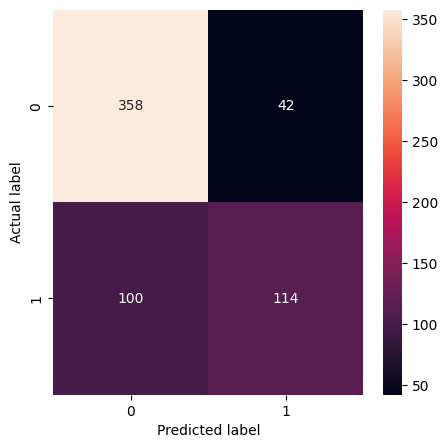

,Accuracy,Recall,Precision,F1-score
0,0.76873,0.53271,0.730769,0.616216


In [ ]:
# evaluate the performance of the training data
log_reg_train = model_performance_classification(log_reg,x_train_sd,y_train)
log_reg_train

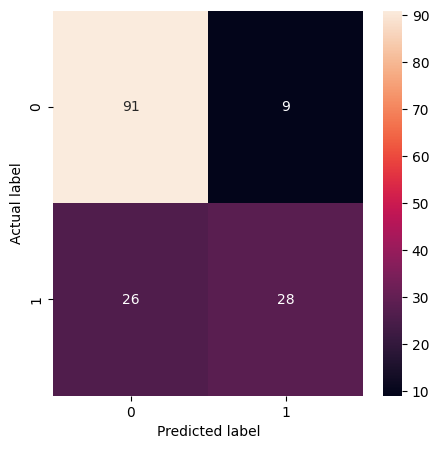

,Accuracy,Recall,Precision,F1-score
0,0.772727,0.518519,0.756757,0.615385


In [ ]:
# test
log_reg_test = model_performance_classification(log_reg,x_test_sd,y_test)
log_reg_test

-Approximately 75.9% of the time, the model accurately predicts whether a patient has diabetes when provided with similar data. However, due to imbalanced data, this likelihood is highly improbable.

-According to the confusion matrix, the model correctly identified 358 individuals as not having diabetes and 114 individuals as having diabetes. However, it also made incorrect predictions, classifying 42 individuals without diabetes as having the condition, and wrongly identifying 100 individuals with diabetes as not having the disease.

The confusion matrix

True Positives (TP): we correctly predicted that they do have diabetes 114

True Negatives (TN): we correctly predicted that they don't have diabetes 358

False Positives (FP): we incorrectly predicted that they do have diabetes (a "Type I error") 42 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they don't have diabetes (a "Type II error") 100 Falsely predict negative Type II error

 - accuracy = TP+TN /(TP+TN+FP+FN)

 - Precision = TP/(TP+FP) out of the postive prediction how many are acctually
correct( precision deal with positive predicctions )
    - The ratio of correct positive predictions to the total predicted positives
 - recall =TP/(TP+FN) out of the positve class in the actual data how many did the model get correctly  (postive class(actual 1 = FN + TP)
  - out people with diabities how many did the model correctly
   predict (recall deal with the positive class . it deals with positive class)
    - Recall is defined as the number of true positives divided by the total number of elements that belong to the positive class. Recall is the same as Sensitivity (SN);
 - FN is actually suppose to postive (postive class(actual 1 = FN + TP)

- F1 = 2 *precision * recall / (precision+ revcall)

## imbalance data
- it occurs when one catigory of your target occurs more than the other catigory( most data are immbalance )

### how to treat imbalance data problem.
- change the performance metric (use percision, recall and F1 instead of accuravy) = this will improve the especific ,metric we are interested in not the the model it self

- change the algorithm(e.g use tree based models )

- Resampling techniques
  - oversample the miniority class(repetition of the minority class can lead to over fitting and poor generalizaion)
  - undersample the majority class(this could lead to underfitting and poor generalization in the test set)
- Generate synthetic samples
  - sythetic minority oversampling technique(smote)

- variant of smote
  - Adasyn and borderline
  - borderline is good when there are outliers in our data

### Model improvement
1 . change the performance metric

2 . balancing the data

3 . hyperparameter tuning  using manual method such as changing alpha and c , or using autho method such a grid scearch etc

- you have to choose between maximinizing recall 1.e minizing FN, wrongly classifying people as not having daibeites or
  - maximinizing precision 1.e mininzing FP, wrongly classifying people as having diabaties ( the hospital will care more about FN)


**Model improvememt(Increasing the threshold from 0.5-0.8)**`

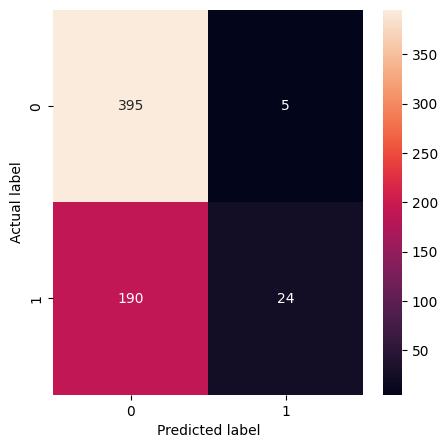

,Accuracy,Recall,Precision,F1-score
0,0.68241,0.11215,0.827586,0.197531


In [ ]:
# model impovement
# change metric (change the threshold = 0.8)
log_reg2_train = model_performance_classification(log_reg,x_train_sd,y_train, threshold=0.8)
log_reg2_train

- increasing the threshold increase the precision(decrease the FP) but decrease the recall (increase the FN)

**Model improvememt(Decreasing the threshold from 0.8 to 0.2)**

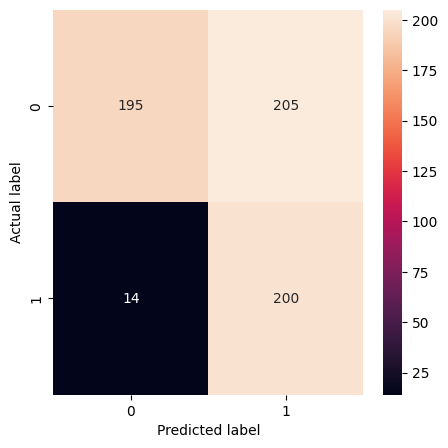

,Accuracy,Recall,Precision,F1-score
0,0.643322,0.934579,0.493827,0.646204


In [ ]:
# model impovement
# change metric (change the threshold = 0.2)
log_reg3_train = model_performance_classification(log_reg,x_train_sd,y_train, threshold=0.2)
log_reg3_train

- decreasing the threshold increase the recall(decrease the FN) but decrease the precision (increase the FP)



Overall, adjusting the threshold in classification models affects precision and recall inversely. Increasing the threshold boosts precision (reducing false positives) but decreases recall (increasing false negatives), while decreasing the threshold enhances recall (reducing false negatives) but reduces precision (increasing false positives). If our priority is to minimize the error of misclassifying people with diabetes as not having it, lowering the threshold is advisable


**Model Improvement(Balancing our data using smoot)**

In [ ]:
# Using Synthetic Minority Over-sampling Technique (SMOTE) to balance the dataset
smote = SMOTE(random_state=0)

# Resampling the dataset to balance the classes
X_sm, y_sm = smote.fit_resample(X, y)


In [ ]:
# Checking the distribution of the sample after using smooth
y_sm.value_counts(normalize=True)

1    0.5
0    0.5
Name: class, dtype: float64

### Using our balanced data

In [ ]:
# when we balance our data using smooth it is not necessary to use stratify
x_train_sm, x_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm,y_sm, test_size=0.2, random_state=0)

In [ ]:
# treat the missing values in the balance data set

# Creating an instance of SimpleImputer to handle missing values
imp = SimpleImputer(missing_values=0, strategy="median")

# Selecting columns for imputation (excluding 'Preg' and 'age')
cols = list(X.drop(["Preg", "age"], axis=1).columns)

# Imputing missing values in the balanced training set
x_train_sm[cols] = imp.fit_transform(x_train_sm[cols])

# Imputing missing values in the balanced testing set
x_test_sm[cols] = imp.transform(x_test_sm[cols])


In [ ]:
# Creating an instance of MinMaxScaler to scale features to a specified range (default range: 0 to 1)
min_max_scaler = MinMaxScaler()

# Scaling the features in the balanced training set
x_train_sm_sd = min_max_scaler.fit_transform(x_train_sm)

# Scaling the features in the balanced testing set
x_test_sm_sd = min_max_scaler.transform(x_test_sm)


### Model Building

In [ ]:
# Creating an instance of Logistic Regression model
log_reg4 = LogisticRegression(random_state=0)

# Fitting the logistic regression model on the standardized balanced training data
log_reg4.fit(x_train_sm_sd, y_train_sm)


LogisticRegression(random_state=0)

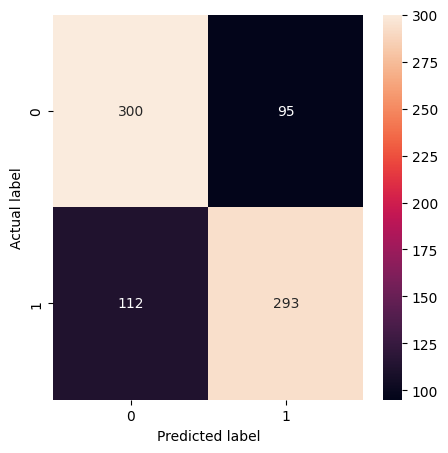

,Accuracy,Recall,Precision,F1-score
0,0.74125,0.723457,0.755155,0.738966


In [ ]:
# Calculating performance metrics for the logistic regression model on the balanced training data
log_reg4_train = model_performance_classification(log_reg4,x_train_sm_sd,y_train_sm)

# Displaying the performance metrics for the logistic regression model on the balanced training data
log_reg4_train


- the because of balancing our data  the recal, precision and F1 score are high

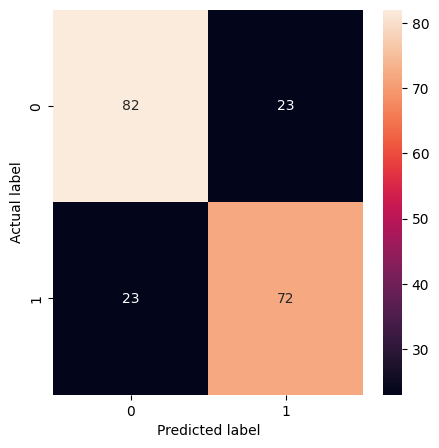

,Accuracy,Recall,Precision,F1-score
0,0.77,0.757895,0.757895,0.757895


In [ ]:
log_reg4_test = model_performance_classification(log_reg4,x_test_sm_sd,y_test_sm)
log_reg4_test

Adjusting the threshold in classification models affects precision and recall inversely. Increasing the threshold boosts precision (reducing false positives) but decreases recall (increasing false negatives), while decreasing the threshold enhances recall (reducing false negatives) but reduces precision (increasing false positives). If our priority is to minimize the error of misclassifying people with diabetes as not having it, lowering the threshold is advisable

Without balancing the data:

Accuracy: 0.76873

Recall: 0.53271

Precision: 0.730769

F1-score: 0.616216

With balancing using SMOTE:

Accuracy: 0.74125

Recall: 0.723457

Precision: 0.755155

F1-score: 0.738966

- Balancing the data using SMOTE slightly decreases accuracy but significantly improves recall, precision, and F1-score. This indicates that balancing the data enhances the model's ability to correctly identify individuals with diabetes while maintaining a good level of precision.


Overall, the model demonstrates good generalization capability as it performed better on the test set compared to the training set.

### Three based models

#### Using grid search to get the optimal model parameters

In [ ]:
# Set the parameters to tune for Decision Tree
param_grid_dt = {
    'max_depth': list(range(1, 16)),
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy'],
}

# Instantiate the Decision Tree classifier
dt = DecisionTreeClassifier(random_state=0)

# Hyperparameter tuning based on a classification metric (e.g., recall)
grid_dt = GridSearchCV(dt, param_grid_dt, cv=5, n_jobs=-1, scoring='recall')

# Fit the grid search model on the training set
grid_dt.fit(x_train_sm_sd, y_train_sm)

# Get the best hyperparameters for Decision Tree
best_para_dt = grid_dt.best_params_
print("Best hyperparameters for Decision Tree:", best_para_dt)

# Set the parameters to tune for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': list(range(1, 16)),
    'min_samples_split': [2, 5, 10],
}

# Instantiate the Random Forest classifier
rf = RandomForestClassifier(random_state=0)

# Hyperparameter tuning based on a classification metric (e.g., recall)
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, n_jobs=-1, scoring='recall')

# Fit the grid search model on the training set
grid_rf.fit(x_train_sm_sd, y_train_sm)

# Get the best hyperparameters for Random Forest
best_para_rf = grid_rf.best_params_
print("Best hyperparameters for Random Forest:", best_para_rf)

# Set the parameters to tune for Gradient Boosting
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}

# Instantiate the Gradient Boosting classifier
gb = GradientBoostingClassifier(random_state=0)

# Hyperparameter tuning based on a classification metric (e.g., recall)
grid_gb = GridSearchCV(gb, param_grid_gb, cv=5, n_jobs=-1, scoring='recall')

# Fit the grid search model on the training set
grid_gb.fit(x_train_sm_sd, y_train_sm)

# Get the best hyperparameters for Gradient Boosting
best_para_gb = grid_gb.best_params_
print("Best hyperparameters for Gradient Boosting:", best_para_gb)


Best hyperparameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}
Best hyperparameters for Random Forest: {'max_depth': 11, 'min_samples_split': 5, 'n_estimators': 100}
Best hyperparameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}


#### Building the model with best parameter and comparing there performance

In [ ]:
# Create the models
decision_tree = DecisionTreeClassifier(**best_para_dt, random_state=0)
random_forest = RandomForestClassifier(**best_para_rf, random_state=0)
gradient_boosting = GradientBoostingClassifier(**best_para_gb, random_state=0)

# Create a list of models
models = [decision_tree, random_forest, gradient_boosting]

# Create empty lists to store the evaluation metrics
model_names = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Perform cross-validation and calculate evaluation metrics for each model
for model in models:
    model_name = model.__class__.__name__
    model_names.append(model_name)

    scores = cross_val_score(model, x_train_sm_sd, y_train_sm, cv=5)  # 5-fold cross-validation
    accuracy_scores.append(np.mean(scores))

    y_pred = model.fit(x_train_sm_sd, y_train_sm).predict(x_train_sm_sd)
    precision_scores.append(precision_score(y_train_sm, y_pred))
    recall_scores.append(recall_score(y_train_sm, y_pred))
    f1_scores.append(f1_score(y_train_sm, y_pred))

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1-score': f1_scores
})

# Print the DataFrame
print(results_df)


                        Model  Accuracy  Precision    Recall  F1-score
0      DecisionTreeClassifier   0.72500   0.671958  0.940741  0.783951
1      RandomForestClassifier   0.80125   0.929577  0.977778  0.953069
2  GradientBoostingClassifier   0.80250   0.936019  0.975309  0.955260


### visualizing the performance of  the three based model

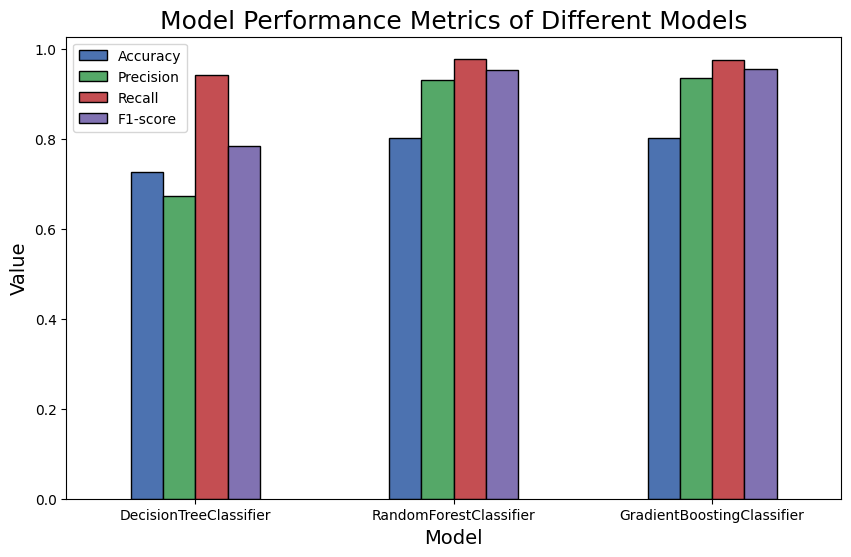

In [ ]:
# Visualization of the results
data = {
    'Model': ['DecisionTreeClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier'],
    'Accuracy': [0.72500, 0.80125, 0.80250],
    'Precision': [0.671958, 0.929577, 0.936019],
    'Recall': [0.940741, 0.977778, 0.975309],
    'F1-score': [0.783951, 0.953069, 0.955260]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Set the Model column as the index
df.set_index('Model', inplace=True)

# Set the color palette
colors = ['#4c72b0', '#55a868', '#c44e52', '#8172b2']

# Plotting
ax = df.plot(kind='bar', figsize=(10, 6), color=colors, edgecolor='black')

# Setting the plot title and labels
ax.set_title('Model Performance Metrics of Different Models', fontsize=18)
ax.set_xlabel('Model', fontsize=14)
ax.set_ylabel('Value', fontsize=14)
ax.set_xticklabels(df.index, rotation=0)

# Show the plot
plt.show()


Based on these results:


- Random Forest and Gradient Boosting classifiers perform similarly and outperform the Decision Tree classifier in terms of accuracy, precision, recall, and F1-score.

- Random Forest and Gradient Boosting classifiers have higher precision, recall, and F1-score compared to the Decision Tree classifier, indicating their better performance in correctly identifying positive cases while minimizing false positives.

Overall, Random Forest and Gradient Boosting classifiers appear to be more suitable for this classification task compared to the Decision Tree classifier.






#### Determine the contribution of the different factors to the performance of the model

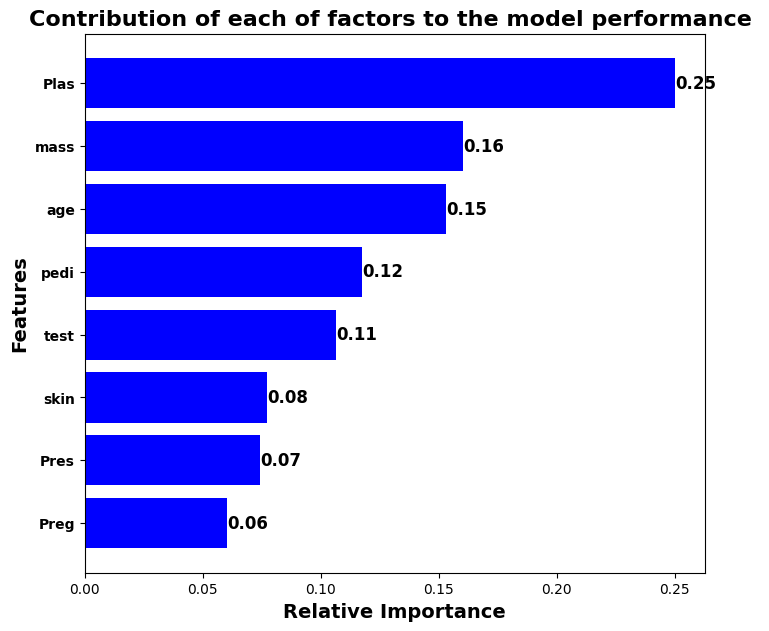

In [ ]:
feature_names = x_train_sm.columns.to_list()

# getting the important features in order of importance
import_feature = random_forest.feature_importances_

# to visualize
import_feature = random_forest.feature_importances_
indices = np.argsort(import_feature)  # sorting the important features
plt.figure(figsize=(8, 7))
plt.title("Contribution of each of factors to the model performance ", fontsize=16, weight='bold')

bars = plt.barh(range(len(indices)), import_feature[indices], color="blue", align="center")

plt.yticks(range(len(indices)), [feature_names[i] for i in indices], fontsize=10, weight='bold')
plt.xlabel("Relative Importance", fontsize=14, weight='bold')
plt.ylabel("Features", fontsize=14, weight='bold')

# Make the numbers in the y-axis labels bold
for i, bar in enumerate(bars):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{import_feature[indices[i]]:.2f}',
             va='center', ha='left', fontsize=12, weight='bold')

plt.show()


###  using decision three to visualize the factor influcing the occurance of diabetes

In [ ]:
#pip install pydotplus
from sklearn import tree
import pydotplus
from IPython.display import Image

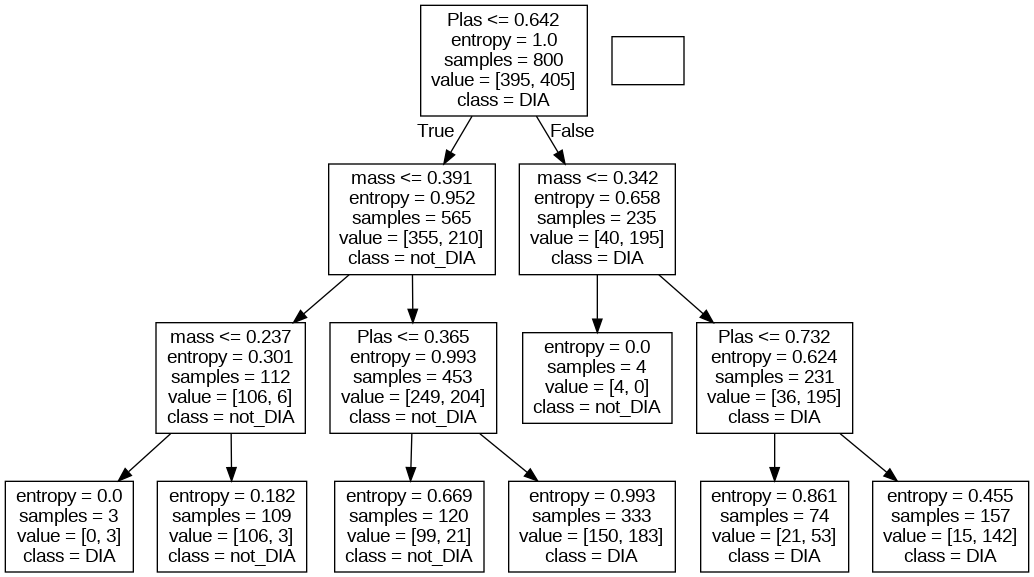

In [ ]:
### depth of 4 and change the name
dot_data = tree.export_graphviz(decision_tree , out_file = None, feature_names = X.columns,
                               class_names=["not_DIA","DIA"])

# create a graph from the dot data
graph = pydotplus.graph_from_dot_data(dot_data)

# create the tree image from the graph
Image(graph.create_png())

- Based on the feature importance analysis and decision tree plots, it's evident that two factors significantly contribute to the occurrence of diabetes: high blood glucose concentration (plas) and high body (mass) index (BMI). These factors demonstrate a positive correlation with the likelihood of diabetes occurrence, meaning that higher values of blood glucose concentration and BMI are associated with a greater probability of diabetes.







## Using RF to build the final model
- this because the performance of RF anf GB where almost identifcal

### checking for overfitting
- will compare the performance of the model on the train and testing data set

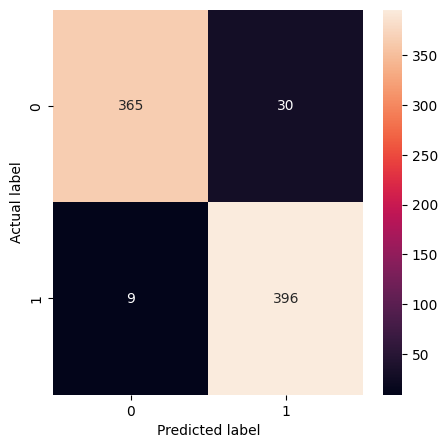

,Accuracy,Recall,Precision,F1-score
0,0.95125,0.977778,0.929577,0.953069


In [ ]:
# Calculating performance metrics for the logistic regression model on the balanced training data
rf_train = model_performance_classification(random_forest,x_train_sm_sd,y_train_sm)

# Displaying the performance metrics for the logistic regression model on the balanced training data
rf_train

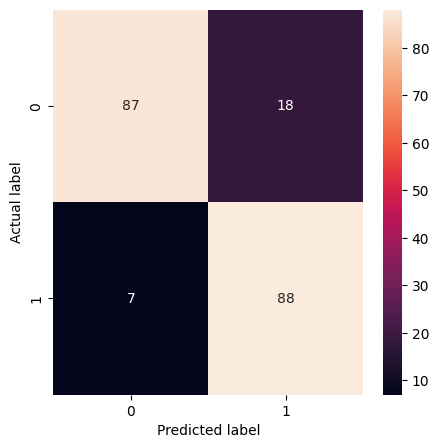

,Accuracy,Recall,Precision,F1-score
0,0.875,0.926316,0.830189,0.875622


In [ ]:
# Calculating performance metrics for the logistic regression model on the balanced training data
rf_test = model_performance_classification(random_forest,x_test_sm_sd,y_test_sm)

# Displaying the performance metrics for the logistic regression model on the balanced training data
rf_test

Based on the provided evaluation metrics for the training and testing sets:

Training Set:

Accuracy: 95.13%

Recall: 97.78%

Precision: 92.96%

F1-score: 95.31%

Testing Set:

Accuracy: 87.50%

Recall: 92.63%

Precision: 83.02%

F1-score: 87.56%

Given the comparison between the performance on the training and testing sets, the model does not seem to be **significantly overfitting**. However, there is a noticeable drop in performance metrics from the training to the testing set, indicating **some degree of overfitting**. This drop in performance is expected as models often perform better on data they were trained on compared to unseen data. Overall, while there is a **slight indication of overfitting**, the model's performance on the testing set is still relatively strong, suggesting it generalizes reasonably well to unseen data. Regularization techniques or further optimization may help mitigate potential overfitting.


#### decreasing the max depth from 11 to 5 to reduce the effect of overfitting






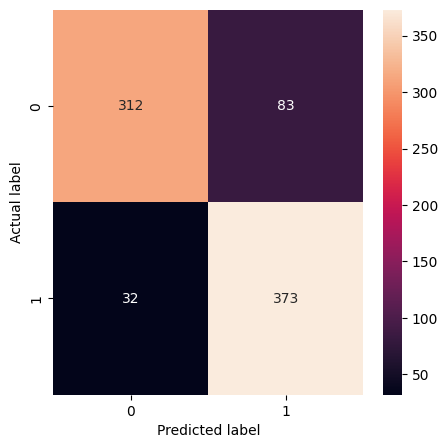

,Accuracy,Recall,Precision,F1-score
0,0.85625,0.920988,0.817982,0.866434


In [ ]:
# instanntiate the classifier
rf = RandomForestClassifier(random_state =0,max_depth=5)

# train the model
rf.fit(x_train_sm_sd,y_train_sm)

# Calculating performance metrics for the logistic regression model on the balanced training data
rf_train = model_performance_classification(rf,x_train_sm_sd,y_train_sm)

# Displaying the performance metrics for the logistic regression model on the balanced training data
rf_train

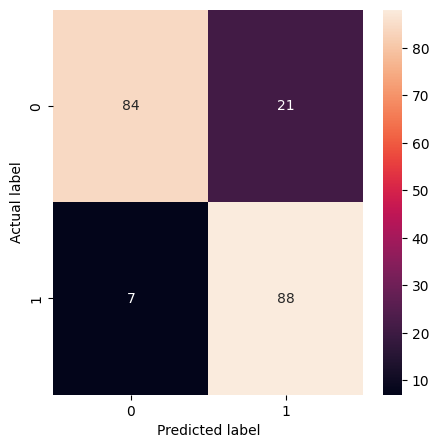

,Accuracy,Recall,Precision,F1-score
0,0.86,0.926316,0.807339,0.862745


In [ ]:
# Calculating performance metrics for the logistic regression model on the balanced training data
rf_test = model_performance_classification(rf,x_test_sm_sd,y_test_sm)

# Displaying the performance metrics for the logistic regression model on the balanced training data
rf_test

- With a maximum depth of 5, the model's performance on both the training and testing sets has slightly decreased compared to the previous model with a maximum depth of 11:

- However, the model's performance on the testing set is comparable to that of the training set, indicating a **reduced likelihood of overfitting** with a maximum depth of 5. However, there is still a slight drop in performance metrics compared to the previous model. This suggests that further optimization or regularization techniques may be beneficial to improve the model's generalization ability while maintaining adequate performance.

- Approximately 86 % of the time, the model accurately predicts whether a patient has diabetes when provided with similar data.

- the model correctly identified 84 individuals as not having diabetes and 88 individuals as having diabetes. However, it also made incorrect predictions, classifying 21 individuals without diabetes as having the condition, and wrongly identifying 7 individuals with diabetes as not having the disease.

- In practical application, with a recall of 92% the model only wrongly identifed 7 individuals with diabetes as not having diabetes.






